# 1. Introduction

# 2. Exploratory Data Analysis (EDA)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There're no null values as we can see

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.rename(columns={'gender':'Gender',
                     'tenure':'Tenure'}, inplace=True)
data.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Since customerID won't be of any use I'm dropping that column
data = data.drop(columns=['customerID'])
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Saving the dataset for now
data.to_csv("cleared_WA_Fn-UseC_-Telco-Customer-Churn.csv", index=False)

## Data Analysis

### Categorical Data
- Gender
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- Churn

### Numerical Data
- SeniorCitizen
    - Can be taken as categorical data eventhough kept as 0s and 1s depending on the process.
    - For EDA part I will be treating this column as categorical.
- Tenure
- MonthlyCharges
- TotalCharges
    - Some values are stored as strings instead of floats.
    - There are **11 rows** where TotalCharges = 0.
    - I will either **fill them** or **remove them** during preprocessing.


In [8]:
#These are actually the NaN TotalCharges values.
data[pd.to_numeric(data['TotalCharges'], errors='coerce').isna()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
#Converting TotalCharges values to numerical data.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isna().sum()

np.int64(11)

In [10]:
#Since only 11 rows have NaN values among 7043 rows I decided to drop those rows.
data = data.dropna(subset=['TotalCharges'])

In [11]:
data.info()
#Here we can see 11 rows are dropped and TotalCharges is now float.

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   Tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [12]:
#Saving the dataset again.
data.to_csv("cleared_WA_Fn-UseC_-Telco-Customer-Churn.csv", index=False)

In [13]:
#After saving the dataset for the last time I'm converting SeniorCitizen column to categorical data so while analyzing the data I can treat it as categorical data
data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')

## Univariate Analysis

In [14]:
#First I will look into numerical data since there aren't many.
def plotHistogram(column):

    plt.figure()
    plt.hist(data[column], bins = 85, color = "orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title("Data Rate - {}".format(column))
    plt.show()

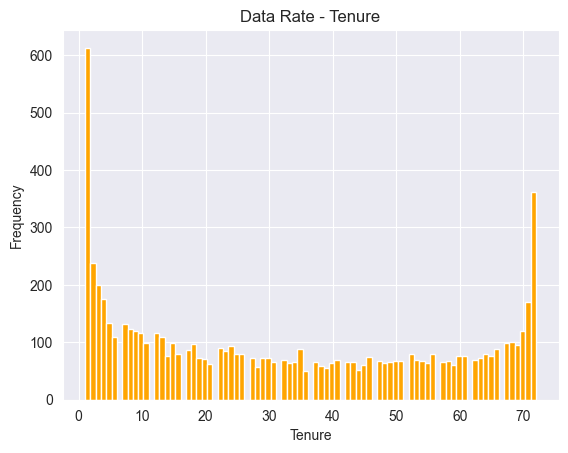

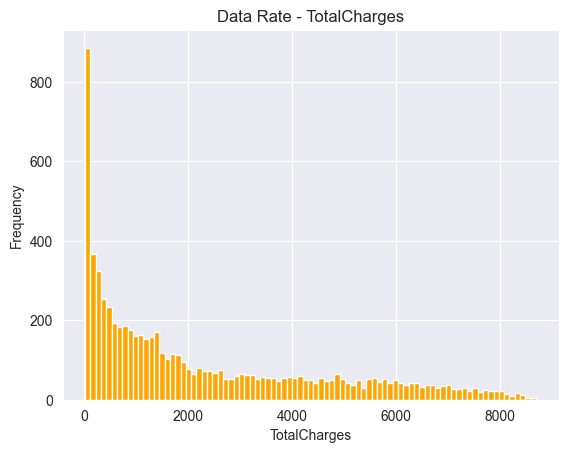

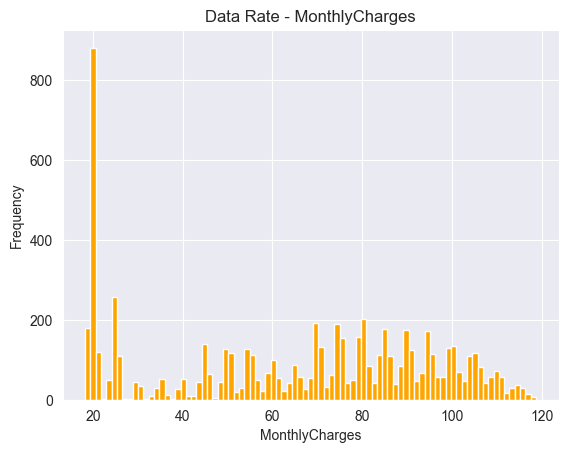

In [15]:
numerical_var = ["Tenure", "TotalCharges", "MonthlyCharges"]

for var in numerical_var:
    plotHistogram(var)

- Tenure distribution shows that some customers are either new or have been with the company for a long time, while most are in the mid-range.
- Because many customers are new, their TotalCharges values are naturally low, leading to a higher frequency of smaller charges in the dataset.

In [16]:
data.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


- Dataset contains 7032 rows in total.
- Looking at Tenure, half of the customers have stayed for 29 months or less, and the average tenure is around 32.42 months. This suggests a balanced mix of both new customers and long-term loyal customers.
- For MonthlyCharges, the mean is slightly lower than the median, which indicates that the data is slightly skewed toward lower charges — meaning there are more customers on cheaper plans.
- TotalCharges range from $18.80 to $8684.80, showing a wide spread in the data. The high standard deviation also confirms that there’s significant variability. In most cases, higher total charges come from customers who have been subscribed longer and are on more expensive plans.


In [17]:
def boxplot(column):
    plt.boxplot(data[column])
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.ylabel("Value")
    plt.show()

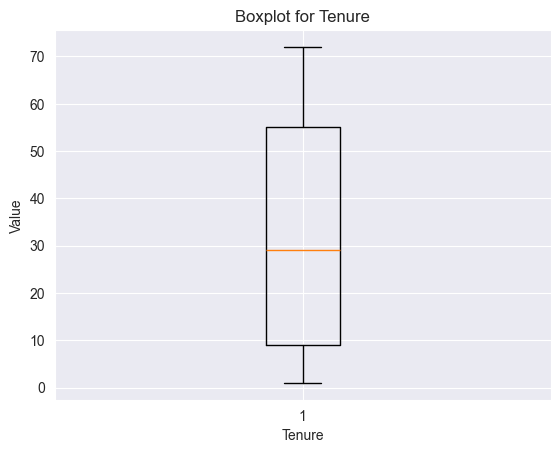

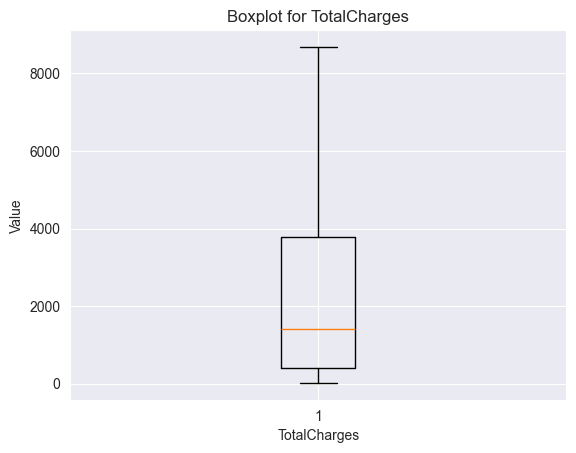

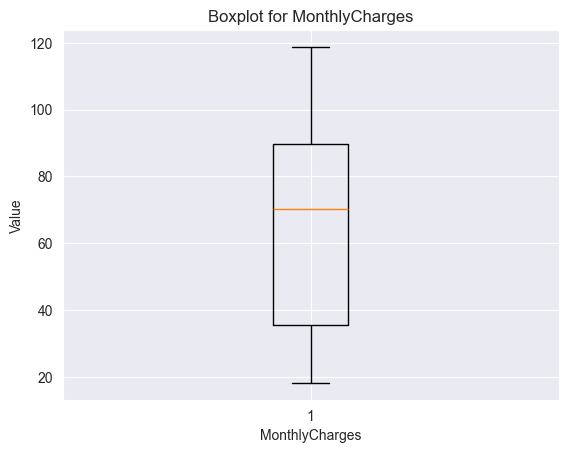

In [18]:
for var in numerical_var:
    boxplot(var)

- Since there are no dots out of range there are **no outliers**.
- Except for the monthlycharges other two are right skewed.

## Categorical Data
- Gender
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- Churn
- SeniorCitizen
    - Can be taken as categorical data eventhough kept as 0s and 1s depending on the process.
    - For EDA I will be treating this column as categorical.

In [19]:
def plotBar(variable):

    plt.figure()
    data[variable].value_counts().plot(kind="bar", color="orange")
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title("Frequency - {}".format(variable))
    plt.show()


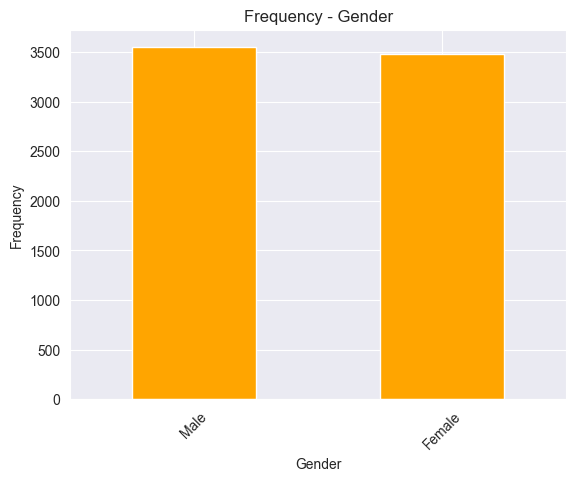

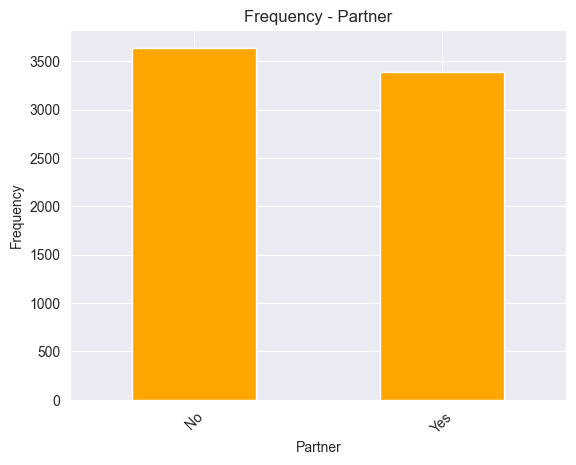

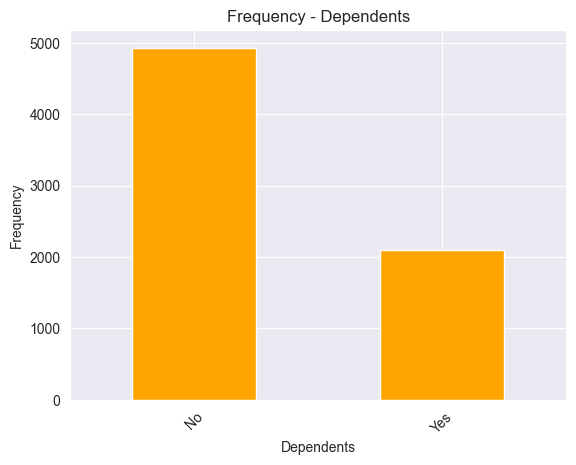

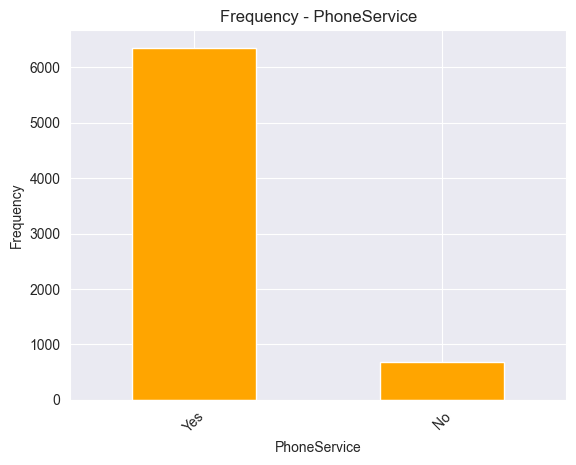

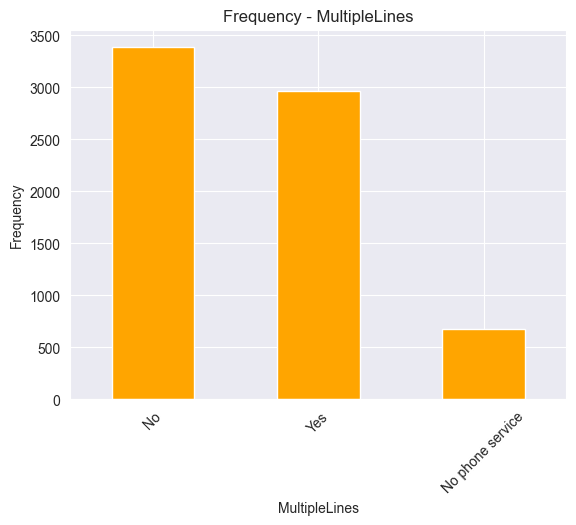

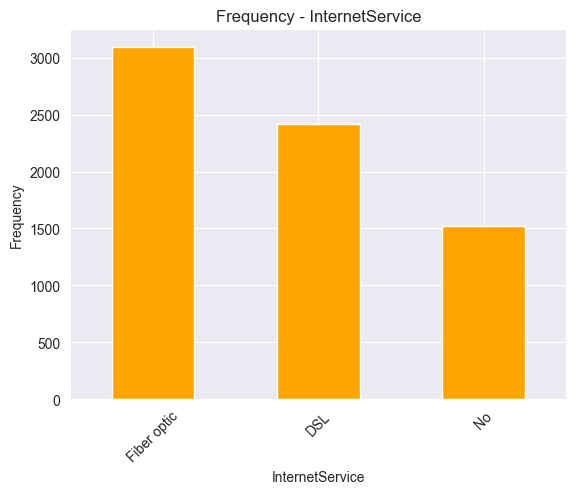

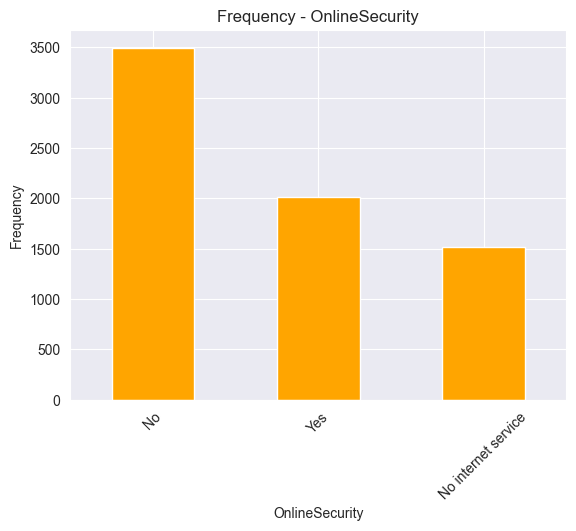

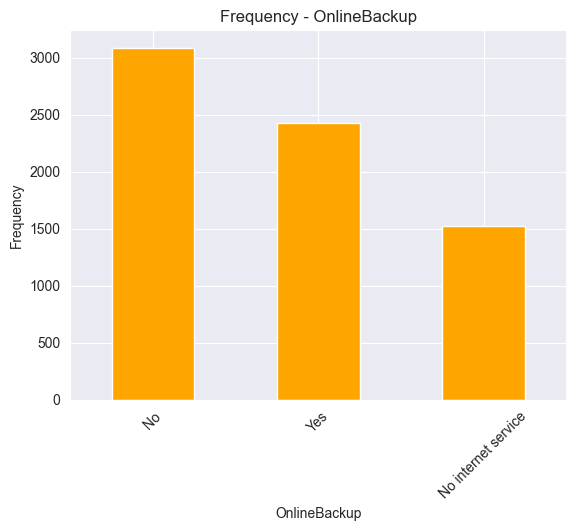

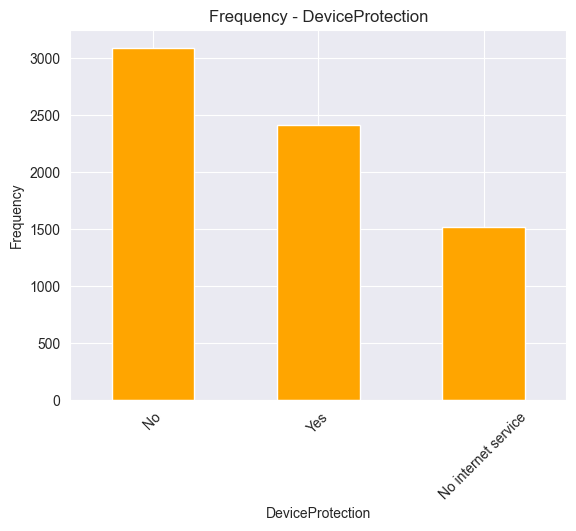

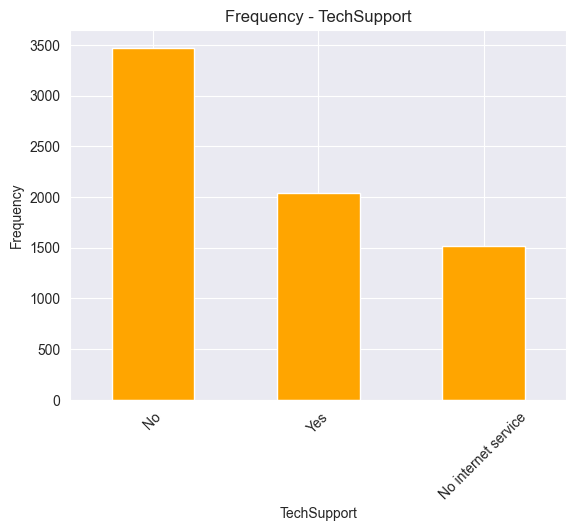

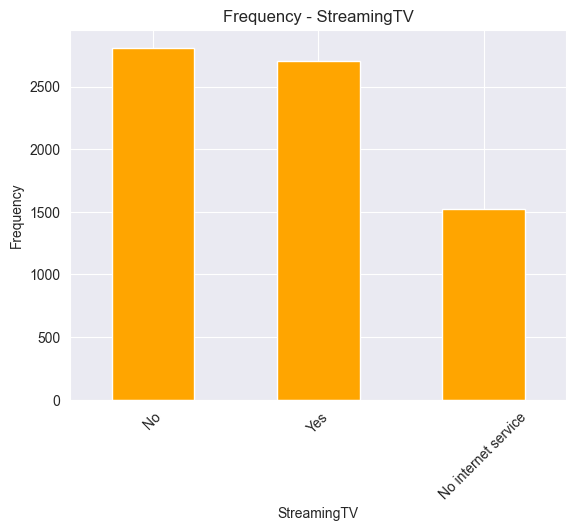

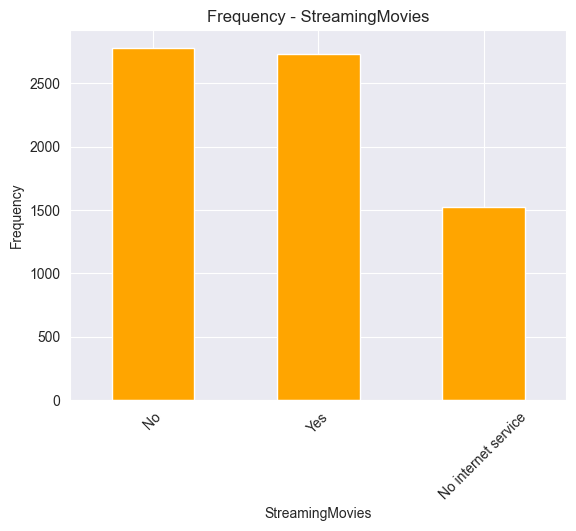

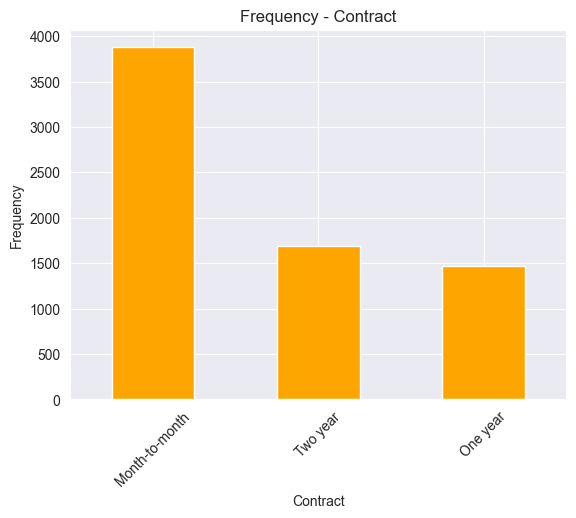

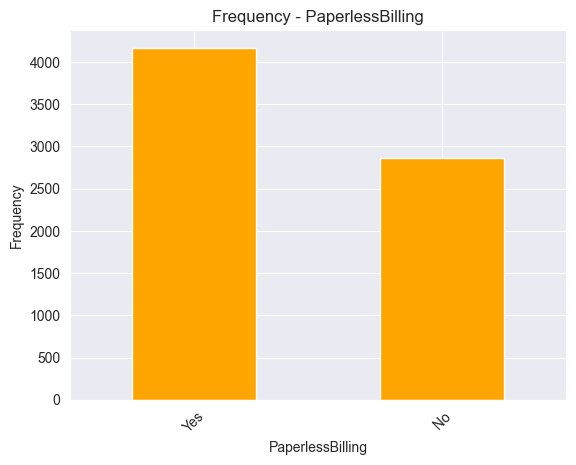

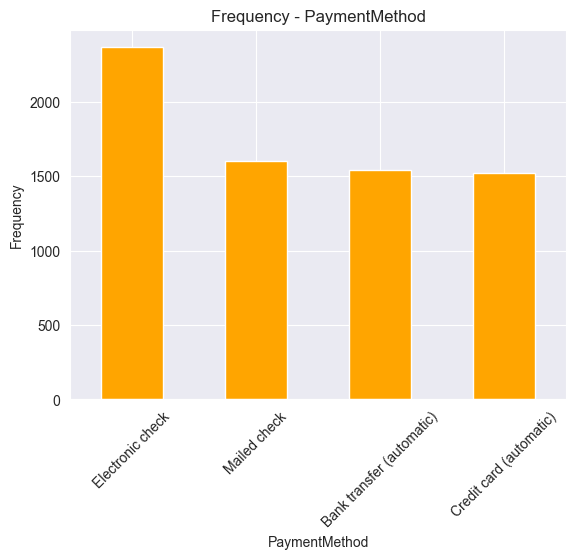

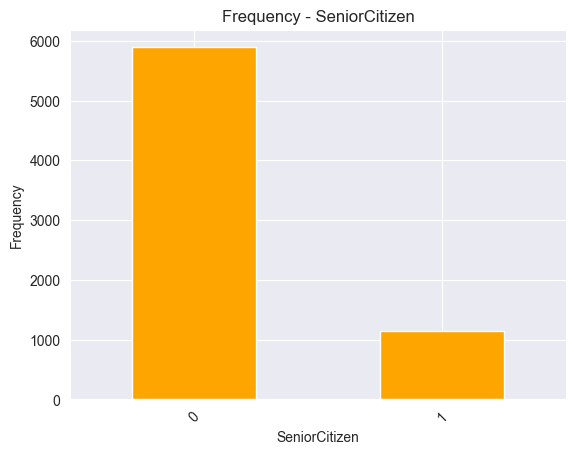

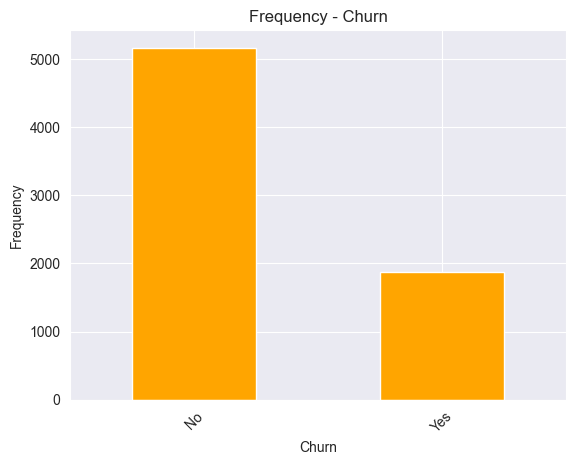

In [20]:
categorical_var = ["Gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "SeniorCitizen", "Churn"]
for var in categorical_var:
    plotBar(var)


- Nearly all customers have PhoneService.
- Most of the customers are not senior citizens.
- Since Gender and Partner are almost evenly distributed, they’re less likely to have a strong effect on the model’s predictions. However, it’s still worth checking their relationship with churn specifically to be sure.
- PhoneService and SeniorCitizen might have a lower impact since one category clearly dominates the other, which reduces their overall predictive power.
- The remaining variables are relatively balanced, so they’re more likely to contribute meaningfully to the model’s performance.


## Bivariate Analysis
I will analyze the relationship between features and Churn.

In [21]:
#Relationship between numerical data
data.loc[:,["Tenure","MonthlyCharges","TotalCharges"]].corr()

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


As predicted Tenure is positively related with TotalCharges.

In [22]:
temp_data = data.copy()
temp_data = pd.get_dummies(temp_data, columns=['Gender'])
temp_data['Churn'] = temp_data['Churn'].map({'No': 0, 'Yes': 1})
temp_data.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,True,False
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,False,True
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,False,True
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,False,True
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,True,False


In [23]:
temp_data.loc[:,["Gender_Female", "Gender_Male", "Churn"]].corr()

,Gender_Female,Gender_Male,Churn
Gender_Female,1.000000,-1.000000,0.008545
Gender_Male,-1.000000,1.000000,-0.008545
Churn,0.008545,-0.008545,1.000000


As predicted gender's effect on churn is very low.

In [24]:
temp_data.loc[:,["Tenure","MonthlyCharges","TotalCharges", "Churn"]].corr()

,Tenure,MonthlyCharges,TotalCharges,Churn
Tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


From this correlation matrix we can say that;

- The longer the customer stays they are less likely to leave. (from negative correlation)
- When monthly charges increase users are more likely to leave, but since correlation is low in value this doesn't affect churn that much.
- The customers who've spent more overall tend to stay longer. (from weak negative correlation)

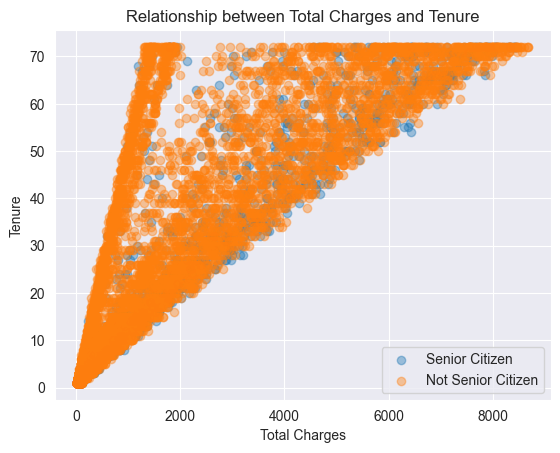

In [25]:
senior = temp_data[temp_data.SeniorCitizen == 1]
notSenior = temp_data[temp_data.SeniorCitizen == 0]
plt.figure()
plt.scatter(senior.TotalCharges, senior.Tenure, alpha = 0.4, label = "Senior Citizen")
plt.scatter(notSenior.TotalCharges, notSenior.Tenure, alpha = 0.4, label = "Not Senior Citizen")
plt.xlabel("Total Charges")
plt.ylabel("Tenure")
plt.title("Relationship between Total Charges and Tenure")
plt.legend()
plt.legend()
plt.show()

In [26]:
def stacked_bar(var):
    ct = pd.crosstab(data[var], data['Churn'])
    ct_pct = ct.div(ct.sum(axis=1), axis=0)
    ct_pct.plot(kind='bar', stacked=True, figsize=(8,5), colormap="coolwarm")

    plt.title("Churn Rate by {}".format(var))
    plt.ylabel("Proportion of {}".format(var))
    plt.xlabel(var)
    plt.legend(title="Churn", loc="upper right")
    plt.show()


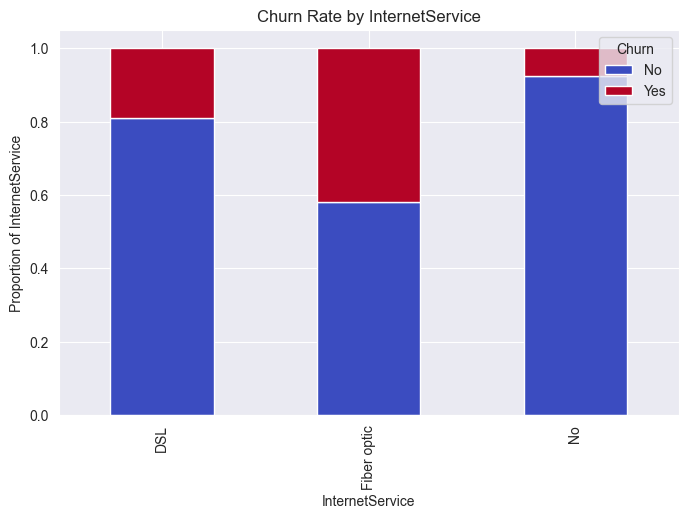

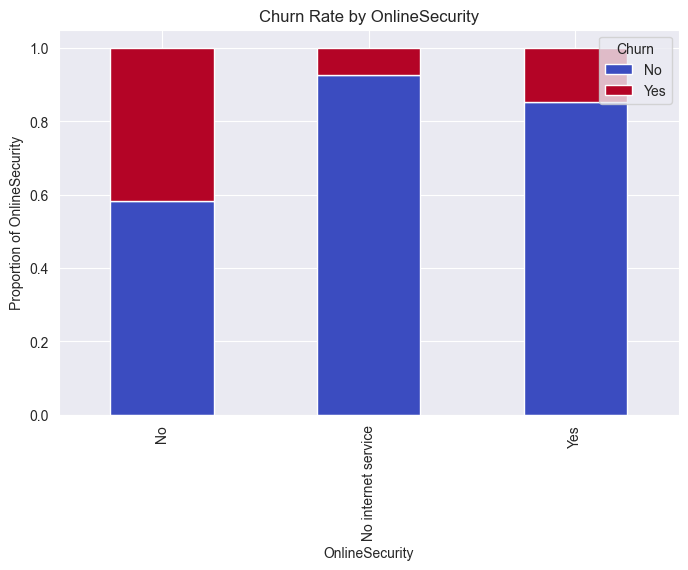

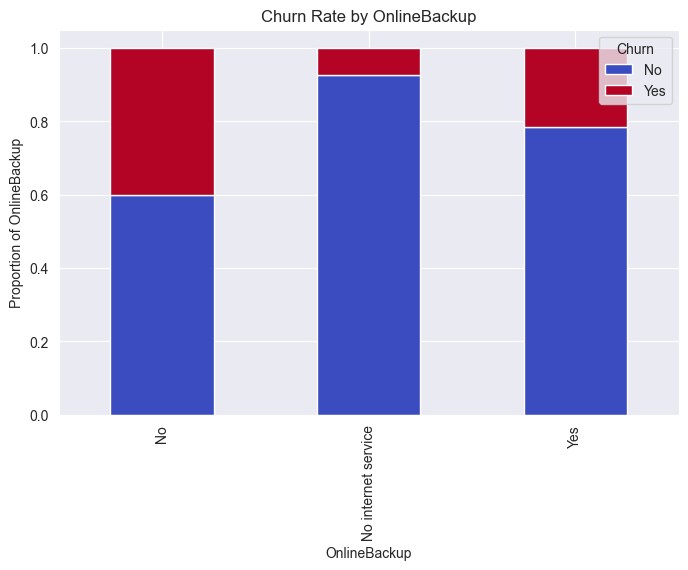

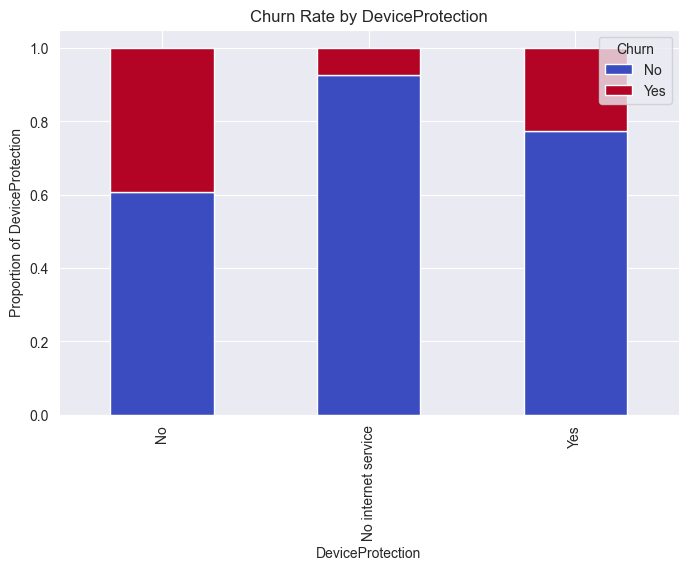

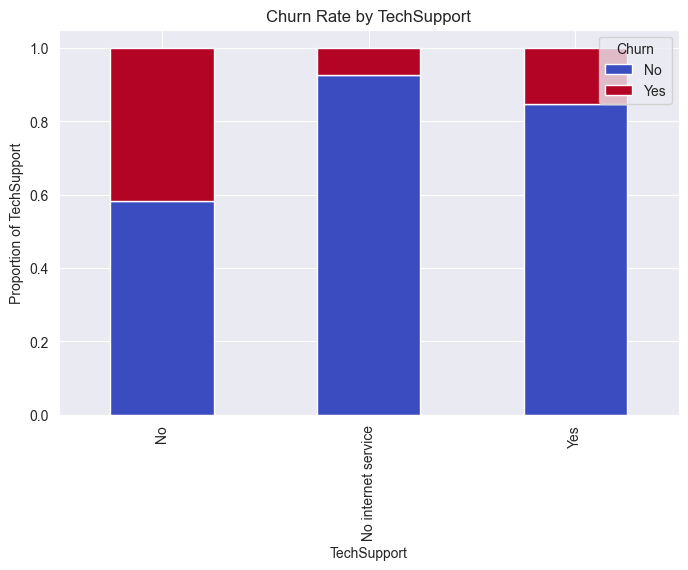

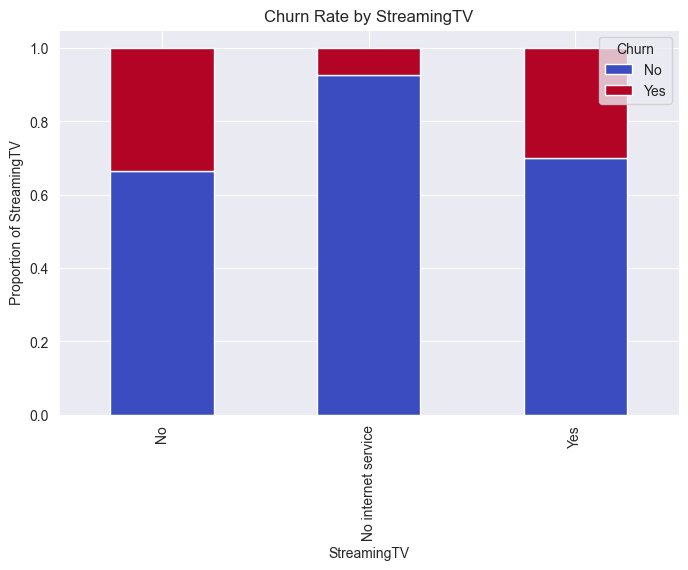

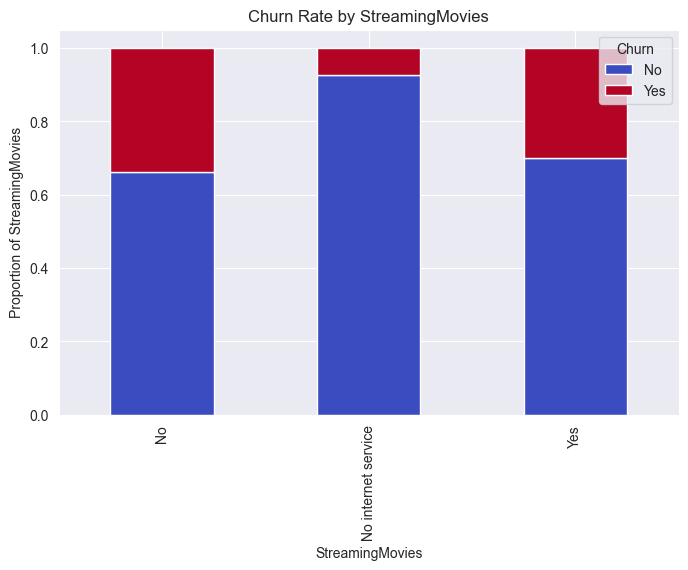

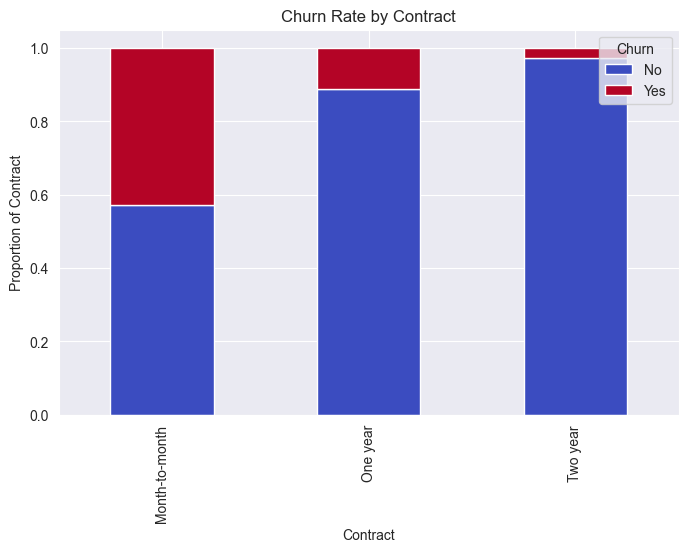

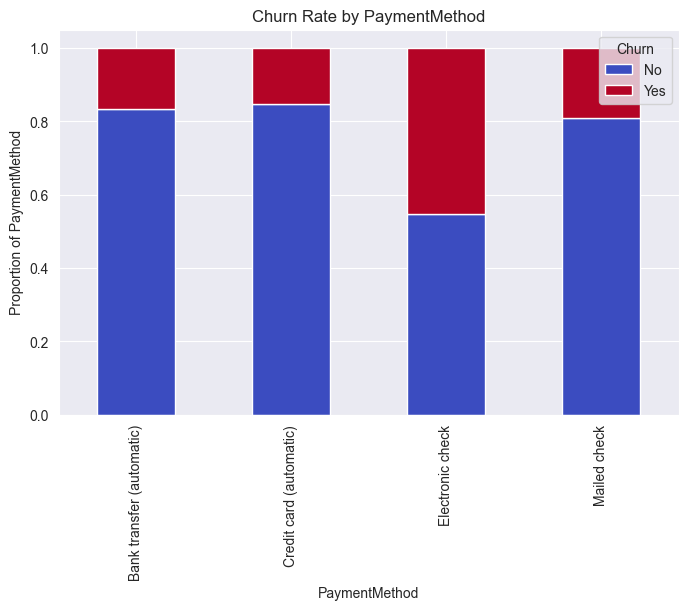

In [27]:
categorical_var = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
for var in categorical_var:
    stacked_bar(var)

- Customers that have month to month contracts tend to leave more.

Churn                                           No       Yes
Contract       PaymentMethod                                
Month-to-month Bank transfer (automatic)  0.658744  0.341256
               Credit card (automatic)    0.672192  0.327808
               Electronic check           0.462703  0.537297
               Mailed check               0.684211  0.315789
One year       Bank transfer (automatic)  0.902813  0.097187
               Credit card (automatic)    0.896985  0.103015
               Electronic check           0.815562  0.184438
               Mailed check               0.931548  0.068452
Two year       Bank transfer (automatic)  0.966192  0.033808
               Credit card (automatic)    0.977586  0.022414
               Electronic check           0.922619  0.077381
               Mailed check               0.992000  0.008000


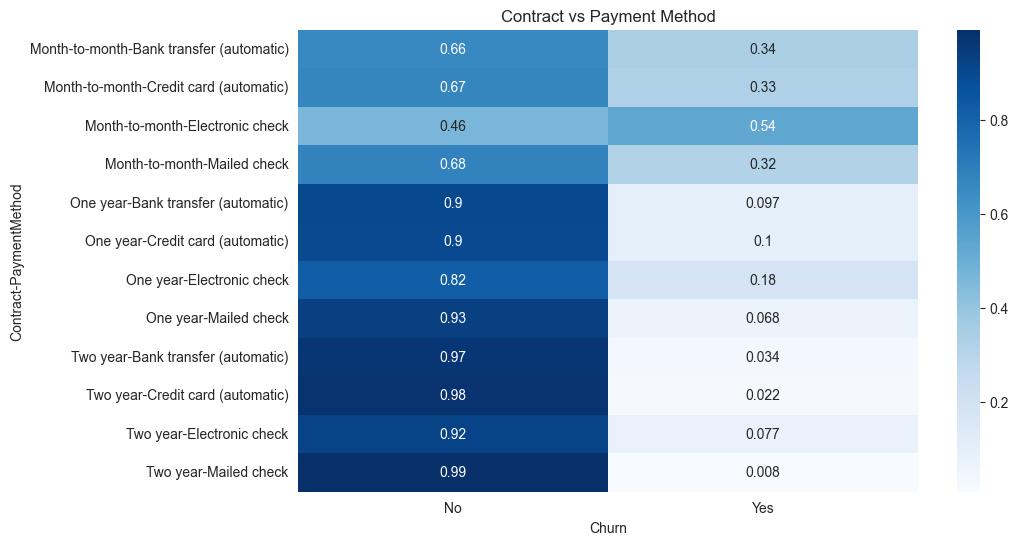

In [28]:
ct_churn = pd.crosstab([data['Contract'], data['PaymentMethod']], data['Churn'])
ct_pct = ct_churn.div(ct_churn.sum(axis=1), axis=0)
print(ct_pct)

plt.figure(figsize=(10,6))
sns.heatmap(ct_pct, annot=True, cmap="Blues")
plt.title("Contract vs Payment Method")
plt.show()

Churn                                      No       Yes
TechSupport         InternetService                    
No                  DSL              0.722222  0.277778
                    Fiber optic      0.506278  0.493722
No internet service No               0.925658  0.074342
Yes                 DSL              0.902896  0.097104
                    Fiber optic      0.773672  0.226328


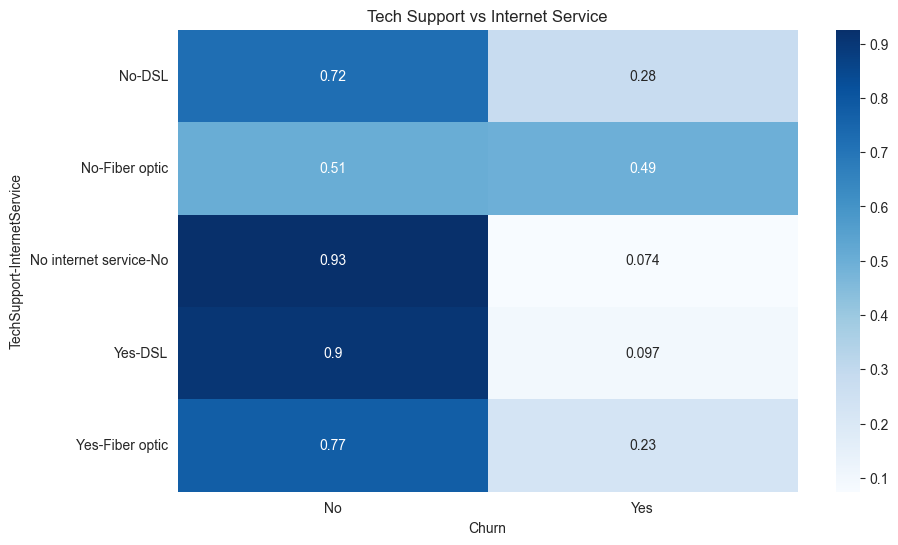

In [29]:
ct_churn = pd.crosstab([data['TechSupport'], data['InternetService']], data['Churn'])
ct_pct = ct_churn.div(ct_churn.sum(axis=1), axis=0)
print(ct_pct)

plt.figure(figsize=(10,6))
sns.heatmap(ct_pct, annot=True, cmap="Blues")
plt.title("Tech Support vs Internet Service")
plt.show()

Churn is particularly high among customers with Fiber Optic internet who lack tech support, with nearly 50% of them leaving. This group represents a major churn risk.

Churn                                      No       Yes
DeviceProtection    InternetService                    
No                  DSL              0.747601  0.252399
                    Fiber optic      0.500288  0.499712
No internet service No               0.925658  0.074342
Yes                 DSL              0.889727  0.110273
                    Fiber optic      0.684598  0.315402


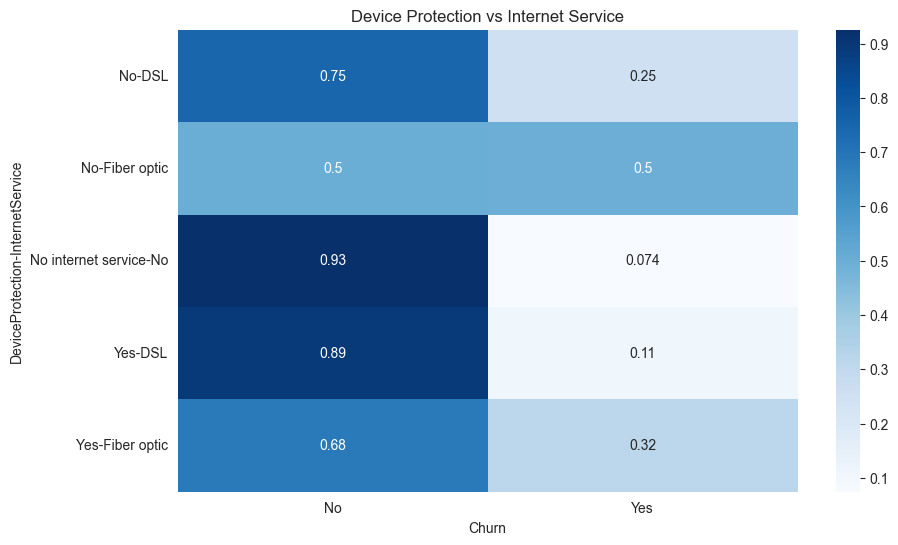

In [30]:
ct_churn = pd.crosstab([data['DeviceProtection'], data['InternetService']], data['Churn'])
ct_pct = ct_churn.div(ct_churn.sum(axis=1), axis=0)
print(ct_pct)

plt.figure(figsize=(10,6))
sns.heatmap(ct_pct, annot=True, cmap="Blues")
plt.title("Device Protection vs Internet Service")
plt.show()

Fiber Optic customers without device protection churn at a rate of 50%, while those with protection churn at 32%. This suggests that device protection mitigates churn risk for Fiber Optic users, although they still churn more than DSL users.

## Multivariate Analysis

In [31]:
data_pivot = data.pivot_table(index="Churn", columns = "Contract",
                 values=["Tenure","MonthlyCharges","TotalCharges"],
                aggfunc={"Tenure":np.mean,"MonthlyCharges":np.mean,"TotalCharges":[min, max, np.std]})
data_pivot.head()

MonthlyCharges                               Tenure             \
                   mean                                 mean              
Contract Month-to-month   One year   Two year Month-to-month   One year   
Churn                                                                     
No            61.462635  62.540926  60.112798      21.033333  41.705972   
Yes           73.019396  85.050904  86.777083      14.016918  44.963855   

                      TotalCharges                                            \
                               max                              min            
Contract   Two year Month-to-month One year Two year Month-to-month One year   
Churn                                                                          
No        56.948687         8061.5  8309.55  8672.45          18.85     18.8   
Yes       61.270833         7548.1  8684.80  7856.00          18.85     28.3   

                                                            
                             std                            
Contract Two year Month-to-month     One year     Two year  
Churn                                                       
No          20.35    1690.054484  2196.071516  2567.323227  
Yes        692.10    1481.646935  2230.122564  2098.707593

We can see mean values of Tenure and MonthlyCharges and min, max and mean values of the TotalCharges on
this pivot table.

# 3. Preprocessing

In this section, I’ll prepare the dataset for machine learning models by cleaning and transforming the data into a usable format.

The first column that required adjustment was TotalCharges, which was stored as an object instead of a numeric type. I converted it to float and noticed that a few rows contained null values. Since there were only 11 missing entries, I chose to drop those rows to maintain data consistency. I also dropped the customerID column, as it does not contribute any meaningful information to the machine learning models.

Next, I’ll check the dataset for any duplicate rows to ensure there are no redundant records before moving forward.

In [51]:
#I will be using the dataset I've cleared before.
data = pd.read_csv("cleared_WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.drop_duplicates(inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   Tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


!! Up to this point, I performed only the structural preprocessing steps (removing ID column, correcting data types, dropping duplicates).
The encoding of categorical features and scaling of numerical features will be applied after splitting the data to prevent information leakage from the test set.

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)